# Support Vector Machine
10만개 미만의 작은 데이터에는 좋음. 그 이상은 너무 느리다

p125

- 알고리즘 복잡
- '거리'개념이 있어서, 표준화 필요
- 속도> 좀더 연구 필요
- 분석, 해석, 예측이 어렵다
- 고차원 희소인 텍스트 데이터에 일부 적용 가능

support vector: 결정경계에 가장 영향을 미칠 수 있는 '지지 벡터'
- 해당 그룹을 대표하는 녀석

### 이진 분류 데이터셋

In [ ]:
from sklearn.datasets import make_blobs

In [17]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

[plt rc font](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.rc.html)

In [30]:
font={
    'family': 'Malgun Gothic'
    ,'size':10
}
plt.rc('font', **font)

In [4]:
X, y= make_blobs(centers=4, random_state=8)

In [9]:
X.shape

(100, 2)

In [5]:
y

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

In [6]:
y%=2

In [7]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1])

In [10]:
X[:,0].shape

(100,)

Text(0,0.5,'특성1')

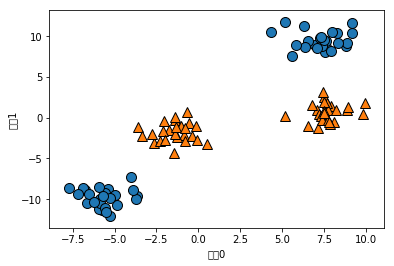

In [18]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)

plt.xlabel("특성0")
plt.ylabel("특성1")

#### 선형으로는 분류되지 않음을 보임
이름은 svm이지만 모듈명은 SVC?

In [19]:
from sklearn.svm import LinearSVC

In [20]:
linear_svm= LinearSVC().fit(X,y)

In [21]:
linear_svm

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0,0.5,'특성1')

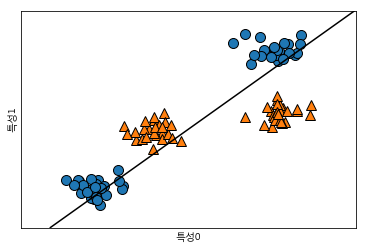

In [31]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel("특성0")
plt.ylabel("특성1")

### scatter:3차원으로 보자
특성추가

In [44]:
print(len(X),len(X[0]))
len([X, X[:, 1:]**2]), len([X, X[:, 1:]**2][0])

100 2


(2, 100)

In [54]:
X[:,1:]**2
[X, X[:,1:]**2] #옆으로 이어붙음

[array([[ -1.72161036,  -1.48033142],
        [ -3.6573384 ,  -9.5482383 ],
        [  7.0778163 ,   0.99508772],
        [ -1.36579859,  -0.3148625 ],
        [ -2.66521206,  -3.12591651],
        [  7.63027116,   8.69797933],
        [ -5.27144331, -12.11880698],
        [  7.91767139,   1.41547387],
        [ -1.41284184,   0.11296348],
        [ -1.01519039,  -1.03318203],
        [  8.2634157 ,  10.34723435],
        [  6.96767867,   8.9622523 ],
        [ -0.84779249,  -2.12185612],
        [  7.48006237,   2.49392925],
        [  7.71454967,   1.8420701 ],
        [ -7.74064658,  -8.61800744],
        [ -5.41087235,  -8.7194128 ],
        [ -2.27579204,  -2.89699926],
        [ -1.25668449,  -2.33416219],
        [  7.61227907,   9.4463627 ],
        [  8.81545663,   8.76386046],
        [  7.1895354 ,   0.43090048],
        [  7.40292703,   9.16217702],
        [  5.17209648,  11.78064756],
        [ -2.10476115,  -1.57846672],
        [  6.5342397 ,   9.45532341],
        [  7

In [56]:
import numpy as np

In [58]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [57]:
X_new= np.hstack([X, X[:, 1:]**2])

In [59]:
figure= plt.figure()

In [60]:
ax= Axes3D(figure, elev=-152, azim=-26)

In [66]:
mask= y==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b'
          ,cmap= mglearn.cm2, s=60, edgecolor= 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c= 'r', marker= '^'
          ,cmap= mglearn.cm2, s=60, edgecolor= 'k')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1**2')

Text(0.5,0,'특성1**2')

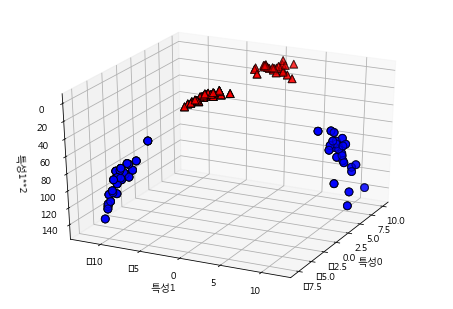

In [67]:
figure

### 선형모델~3차원 공간 평면으로 클래스 분류

In [73]:
linear_svm_3d= LinearSVC().fit(X_new, y)

In [74]:
linear_svm_3d

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [79]:
print(linear_svm_3d.coef_.ravel(),'\'~\'', linear_svm_3d.intercept_)

[ 0.11389134 -0.19245444 -0.05131482] '~' [1.15149457]


In [78]:
coef, intercept= linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

####  선형 결정 경계 그리기

In [83]:
# Axes3D? #Axes3D(fig, rect=None, *args, **kwargs)

In [85]:
# 최소-2 ~ 최대+2 를 50조각
np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)

array([-9.74064658e+00, -9.29840934e+00, -8.85617211e+00, -8.41393487e+00,
       -7.97169763e+00, -7.52946040e+00, -7.08722316e+00, -6.64498592e+00,
       -6.20274869e+00, -5.76051145e+00, -5.31827421e+00, -4.87603698e+00,
       -4.43379974e+00, -3.99156250e+00, -3.54932527e+00, -3.10708803e+00,
       -2.66485079e+00, -2.22261356e+00, -1.78037632e+00, -1.33813908e+00,
       -8.95901845e-01, -4.53664608e-01, -1.14273715e-02,  4.30809865e-01,
        8.73047102e-01,  1.31528434e+00,  1.75752158e+00,  2.19975881e+00,
        2.64199605e+00,  3.08423329e+00,  3.52647052e+00,  3.96870776e+00,
        4.41094500e+00,  4.85318223e+00,  5.29541947e+00,  5.73765671e+00,
        6.17989394e+00,  6.62213118e+00,  7.06436842e+00,  7.50660565e+00,
        7.94884289e+00,  8.39108013e+00,  8.83331736e+00,  9.27555460e+00,
        9.71779184e+00,  1.01600291e+01,  1.06022663e+01,  1.10445035e+01,
        1.14867408e+01,  1.19289780e+01])

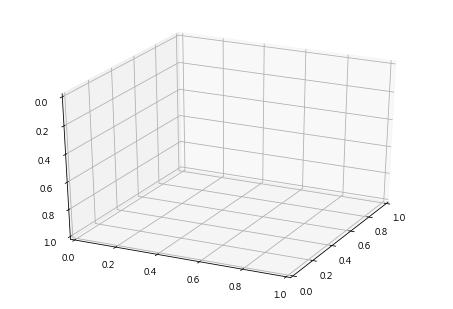

In [125]:
figure.clear('all')

figure= plt.figure()
font={
    'family': 'Malgun Gothic'
    ,'size':10
}
plt.rc('font', **font)

ax= Axes3D(figure, elev= -152, azim= -26)

##### meshgrid: 벡터 기준 브로드캐스팅 함수

In [112]:
xx= np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2, 50)
yy= np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2, 50)

XX, YY= np.meshgrid(xx,yy)
ZZ= (coef[0]*XX+ coef[1]*YY+ intercept)/ -coef[2]

##### 위 값대로 가로지르는 평면 보여줌

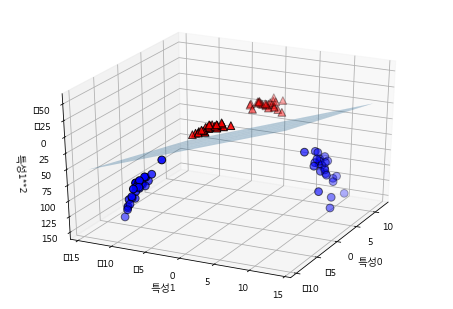

In [126]:
ax.plot_surface(XX, YY, ZZ, rstride= 8, cstride= 8, alpha= 0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c= 'b' #아래 c=파란거
          ,cmap= mglearn.cm2, s= 60, edgecolor= 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c= 'r', marker='^'
          ,cmap= mglearn.cm2, s= 60, edgecolor= 'k')

ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성1**2')
figure

### 매개변수 C와 gamma
둘다 클수록 예민
- C: 개별 데이터에 대해
- gamma: 각 특성에 대해

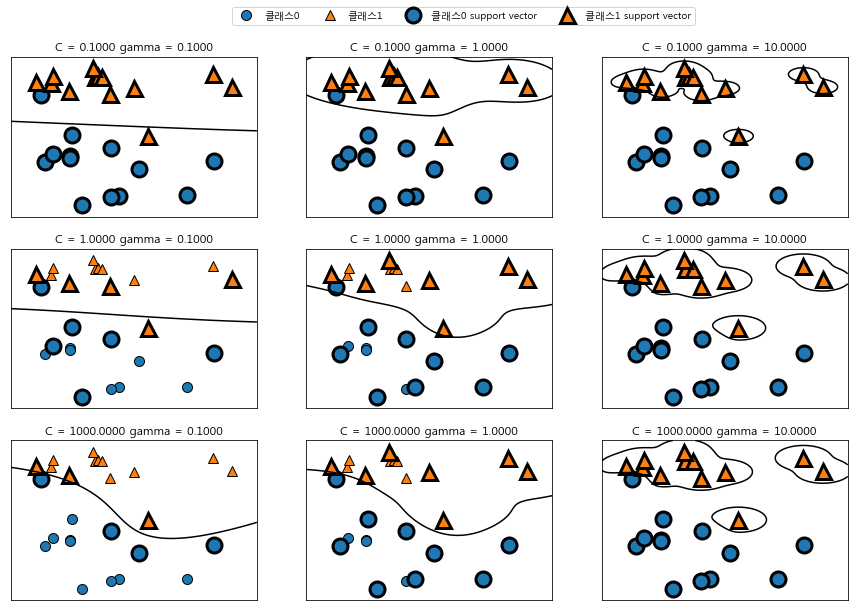

In [127]:
fig, axis= plt.subplots(3, 3, figsize= (15,10))

for ax, C in zip(axis, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C= C, log_gamma= gamma, ax= a)

axis[0,0].legend(['클래스0','클래스1','클래스0 support vector'
                 ,'클래스1 support vector'], ncol=4, loc=(.9, 1.2))

### SVM 커널(SVM 원래 이름): 유방암 데이터

In [1]:
from sklearn.datasets import load_breast_cancer #python cancer data

cancer = load_breast_cancer()
X= cancer.data
y= cancer.target

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state= 0)

In [4]:
#왜 svm 모듈명이 SVC 인 것인가
from sklearn.svm import SVC

In [5]:
svc= SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
print("훈련%9.5f\n새거%9.5f"%(svc.score(X_train, y_train), svc.score(X_test, y_test)))

훈련  1.00000
새거  0.62937


### 각 설명변수 스케일 확인
막대기가 긴 건, 특성별 차이가 큰 것으로> 스케일 조정이 필요해보인다

In [8]:
import matplotlib.pyplot as plt

In [9]:
plt.boxplot(X_train, manage_xticks= False)
plt.yscale('symlog')
plt.xlabel('특성목록')
plt.ylabel('특성크기')

Text(0,0.5,'특성크기')

#### SVM 밑밥: 스케일 조정

In [10]:
min_on_training= X_train.min(axis=0) #특성별 최솟값
range_on_training= (X_train- min_on_training).max(axis= 0) #특성별 최대최소 범위

In [155]:
# len(min_on_training), len(range_on_training)

(30, 30)

#### train
min/ range => 각 특성 [0,1]

In [11]:
X_train_scaled= (X_train- min_on_training)/range_on_training

In [13]:
X_train_scaled

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [14]:
X_train_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
print('특성별min\n',X_train_scaled.min(axis=0))
print('특성별max\n',X_train_scaled.max(axis=0))

특성별min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별max
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### test
방금 계산한거랑 똑같이

In [17]:
X_test_scaled= (X_test- min_on_training)/range_on_training

In [18]:
svc= SVC()
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
print('훈련%9.5f'%svc.score(X_train_scaled, y_train))
print('새거%9.5f'%svc.score(X_test_scaled, y_test))

훈련  0.94836
새거  0.95105


### 통상 1000이 좋더라
현업에서 random 돌리고 있을 시간은 없으니

In [21]:
svc= SVC(1000)
svc.fit(X_train_scaled, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
print('훈련%9.5f'%svc.score(X_train_scaled, y_train))
print('새거%9.5f'%svc.score(X_test_scaled, y_test))

훈련  0.98826
새거  0.97203
